In [1]:
from __future__ import print_function, division, absolute_import

import os

%matplotlib inline
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.io.ascii as at
import astropy.io.fits as fits
import astropy.units as u
from scipy.interpolate import interp1d
from cycler import cycler

In [29]:
matplotlib.rc?

In [3]:
matplotlib.rc("axes",prop_cycle=cycler('color',cm.hot(np.linspace(0,1,10))),
             labelsize=20)
matplotlib.rc("font",size=20)

In [4]:
def calc_sn(w,f,v):
    halpha = (w>6555) & (w<6575)
    tio = (w>7000) & (w<7200)

    s2n = f/v

    print("Halpha",np.median(s2n[halpha]),"TiO",np.median(s2n[tio]))

In [5]:
def read_mdm(filename,to_plot=False,get_sn=False):
    with fits.open(filename) as spec:
#             print(spec.info())
#             print(spec[0].data)
        
            flux = spec[0].data[0][0]

            w0 = np.float(spec[0].header["CRVAL1"])
            wi = np.int(spec[0].header["CRPIX1"])
            wstep = np.float(spec[0].header["CD1_1"])
            w00 = (0-wi)*wstep + w0
            lf = len(flux)
            wavelength = np.arange(w00,w00+(lf-1)*wstep,wstep)
            while len(wavelength)<lf:
                wavelength = np.append(wavelength,
                                       wavelength[-1]+wstep)

            var = spec[0].data[3][0]
#             print(len(wavelength), len(flux), len(var))

            print("sec(z) =",spec[0].header["AIRMASS"],
                  "HA =",spec[0].header["HA"])
            
            if to_plot is True:
                plt.figure(figsize=(10,7))
                for i in range(4):
                    plt.plot(wavelength,spec[0].data[i][0],
                             label="row {0}".format(i))
                    plt.yscale("log")
                    plt.ylim(1e-16,1e-12)
                    plt.xlim(6000,8000)
                    plt.legend(loc="best")
                    
            if get_sn is True:
                print(spec[0].header["EXPTIME"])
                calc_sn(wavelength, flux, var)
                    
    return wavelength, flux, var

In [6]:
def plot_spec(w,f,v,ax=None,wmin=6500,wmax=7500):
    
    if ax is None:
        plt.figure()
        ax = plt.subplot(111)
    
    wreg = (w<=wmax) & (w>=wmin)
    
    ax.errorbar(w[wreg],f[wreg],v[wreg],capsize=0)

    fmin,fmax = min(f[wreg])*0.99,max(f[wreg])*1.01
    ax.set_ylim(fmin,fmax)
    ax.set_xlim(wmin,wmax)    
    ax.set_xlabel("wavelength")
    ax.set_ylabel("flux")


In [8]:
w,f,v = read_mdm(os.path.expanduser("~/data/OSMOS/20171104_3.0/finals/trim.J2043+5509.1.fits"))

sec(z) = 1.17537 HA = +02:03:19


MISFILT                        / MIS Filter Number                               [astropy.io.fits.card]
MISFLTID                       / MIS Filter ID                                   [astropy.io.fits.card]


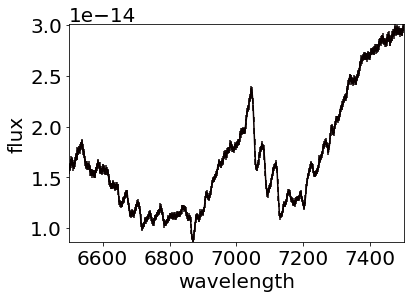

In [9]:
plot_spec(w,f,v)

In [10]:
halpha = (w>6555) & (w<6575)
tio = (w>7000) & (w<7200)

s2n = f/v

print(np.median(s2n[halpha]),np.median(s2n[tio]))

48.97495 60.07238


3 trim.J2043+5509.1.fits
sec(z) = 1.17537 HA = +02:03:19
200.0
Halpha 48.97495 TiO 60.07238
1.2 trim.J2043+5509.1.fits


MISFILT                        / MIS Filter Number                               [astropy.io.fits.card]
MISFLTID                       / MIS Filter ID                                   [astropy.io.fits.card]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sdouglas/Users/stephanie/data/OSMOS/20171104_1.2/finals/trim.J2043+5509.1.fits'

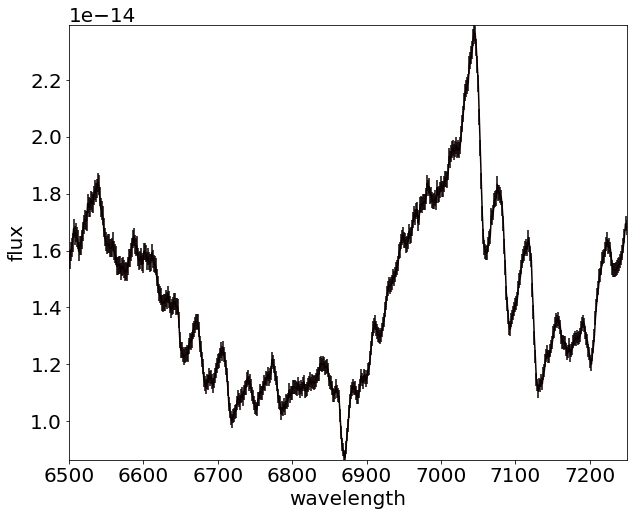

In [12]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

for i in range(3):
    fname = os.path.expanduser("~/data/OSMOS/20171104_3.0/finals/trim.J2043+5509.{0}.fits".format(i+1))
    print("3",fname.split("/")[-1])
    w,f,v = read_mdm(fname,get_sn=True)
    plot_spec(w,f,v,ax=ax,wmin=6500,wmax=7250)
    
    fname = os.path.expanduser("~/Users/stephanie/data/OSMOS/20171104_1.2/finals/trim.J2043+5509.{0}.fits".format(i+1))
    print("1.2",fname.split("/")[-1])
    w,f,v = read_mdm(fname,get_sn=True)
    plot_spec(w,f,v,ax=ax,wmin=6500,wmax=7250)
    
    print("\n")
    
ax.set_ylim(1e-15,2.5e-14)
    

3 trim.J2224+5200.1.fits
60.0
Halpha 15.8487 TiO 18.9816
1.2 trim.J2224+5200.1.fits
120.0
Halpha 15.4973 TiO 18.7832


3 trim.J2224+5200.2.fits
180.0
Halpha 32.8029 TiO 39.2667
1.2 trim.J2224+5200.2.fits
180.0
Halpha 16.6563 TiO 20.1378


1.2 trim.J2224+5200.3.fits
300.0
Halpha 20.6255 TiO 25.5496




(6e-16, 1.7e-14)

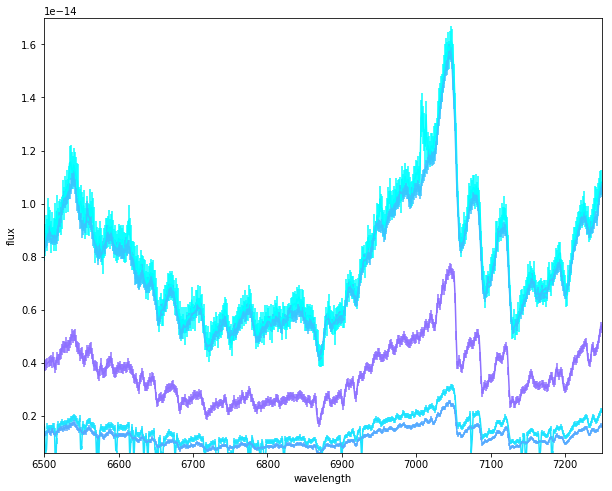

In [24]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

for i in range(3):
    fname = "/Users/stephanie/data/OSMOS/20171104_3.0/finals/trim.J2224+5200.{0}.fits".format(i+1)
    if os.path.exists(fname):
        print("3",fname.split("/")[-1])
        w,f,v = read_mdm(fname,get_sn=True)
        plot_spec(w,f,v,ax=ax,wmin=6500,wmax=7250)
    else:
        plt.plot([],[])
    
    fname = "/Users/stephanie/data/OSMOS/20171104_1.2/finals/trim.J2224+5200.{0}.fits".format(i+1)
    if os.path.exists(fname):
        print("1.2",fname.split("/")[-1])
        w,f,v = read_mdm(fname,get_sn=True)
        plot_spec(w,f,v,ax=ax,wmin=6500,wmax=7250)
    else:
        plt.plot([],[])

    
    print("\n")
    
ax.set_ylim(6e-16,1.7e-14)
    

3 trim.J2043+5509.1.fits
sec(z) = 1.17537 HA = +02:03:19
200.0
Halpha 48.97495 TiO 60.07238
1.2 trim.J2043+5509.1.fits
sec(z) = 1.212128 HA = +02:25:25
300.0
Halpha 26.153656 TiO 33.11435


3 trim.J2043+5509.2.fits
sec(z) = 1.184873 HA = +02:09:29
300.0
Halpha 62.16145 TiO 74.51282
1.2 trim.J2043+5509.2.fits


MISFILT                        / MIS Filter Number                               [astropy.io.fits.card]
MISFLTID                       / MIS Filter ID                                   [astropy.io.fits.card]


sec(z) = 1.223676 HA = +02:31:31
180.0
Halpha 17.733387 TiO 22.71759


3 trim.J2043+5509.3.fits
sec(z) = 1.194678 HA = +02:15:29
120.0
Halpha 36.20819 TiO 44.37448
1.2 trim.J2043+5509.3.fits
sec(z) = 1.231872 HA = +02:35:40
600.0
Halpha 41.171276 TiO 51.35584




(1e-15, 3.5e-14)

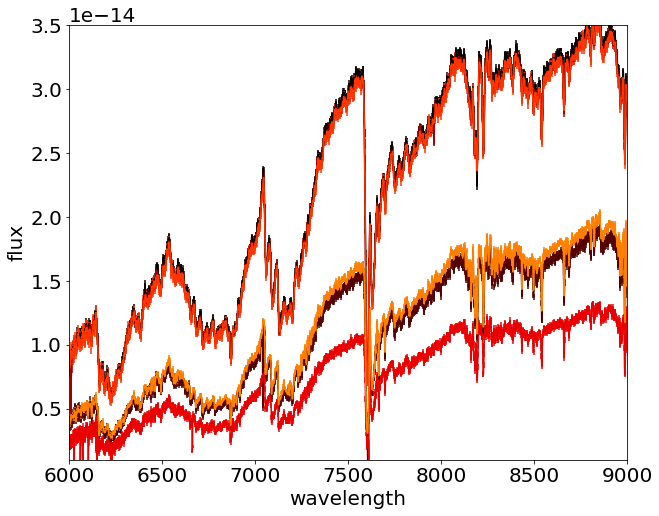

In [14]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

for i in range(3):
    fname = os.path.expanduser("~/data/OSMOS/20171104_3.0/finals/trim.J2043+5509.{0}.fits".format(i+1))
    print("3",fname.split("/")[-1])
    w,f,v = read_mdm(fname,get_sn=True)
    plot_spec(w,f,v,ax=ax,wmin=6000,wmax=9000)
    
    fname = os.path.expanduser("~/data/OSMOS/20171104_1.2/finals/trim.J2043+5509.{0}.fits".format(i+1))
    print("1.2",fname.split("/")[-1])
    w,f,v = read_mdm(fname,get_sn=True)
    plot_spec(w,f,v,ax=ax,wmin=6000,wmax=9000)
    
    print("\n")
    
ax.set_ylim(1e-15,3.5e-14)
    

1.2 trim.J2327+2710.1.fits
sec(z) = 1.010268 HA = -00:30:51
300.0
Halpha 29.965822 TiO 32.19267


1.2 trim.J2327+2710.2.fits
sec(z) = 1.004674 HA = -00:13:29
300.0
Halpha 35.81774 TiO 38.493748


1.2 trim.J2327+2710.3.fits
sec(z) = 1.007379 HA = +00:23:32
300.0
Halpha 32.58881 TiO 36.463436


1.2 trim.J2327+2710.4.fits
sec(z) = 1.047737 HA = -22:42:53
300.0
Halpha 34.88219 TiO 39.424


1.2 trim.J2327+2710.5.fits
sec(z) = 1.09629 HA = -22:10:24
300.0
Halpha 26.43818 TiO 30.465479


1.2 trim.J2327+2710.6.fits
sec(z) = 1.176 HA = -21:34:43
300.0
Halpha 25.178188 TiO 29.959982


1.2 trim.J2327+2710.7.fits
sec(z) = 1.176836 HA = -21:41:57
600.0
Halpha 10.794379 TiO 13.595209


1.2 trim.J2327+2710.8.fits
sec(z) = 1.28231 HA = -21:01:37
300.0
Halpha 11.117626 TiO 14.471963


1.2 trim.J2327+2710.9.fits
sec(z) = 1.385541 HA = -20:37:39
300.0
Halpha 17.92516 TiO 22.185463




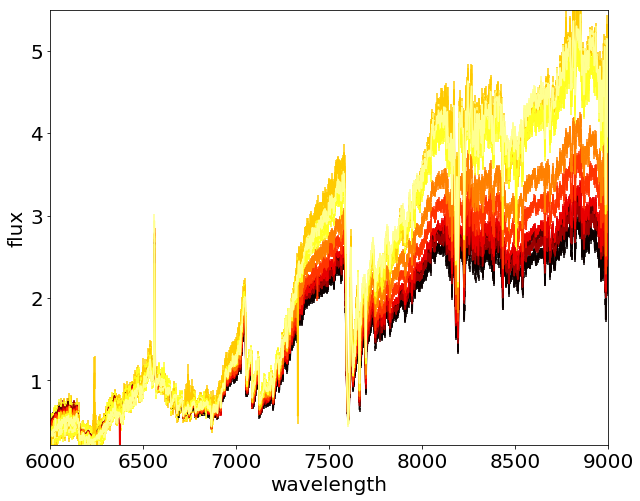

In [15]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

for i in range(9):
    fname = os.path.expanduser("~/data/OSMOS/20171105_1-2.2/finals/trim.J2327+2710.{0}.fits".format(i+1))
    print("1.2",fname.split("/")[-1])
    w,f,v = read_mdm(fname,get_sn=True)
    norm_reg = (w>6565) & (w<6575)
    norm_by = np.median(f[norm_reg])
    plot_spec(w,f/norm_by,v/norm_by,ax=ax,wmin=6000,wmax=9000)
    print("\n")
    
# ax.set_ylim(1e-15,3.5e-14)
plt.savefig("J2327+2710_airmass_reddening.png")        

sec(z) = 1.010268 HA = -00:30:51
300.0
Halpha 29.965822 TiO 32.19267
sec(z) = 1.004674 HA = -00:13:29
300.0
Halpha 35.81774 TiO 38.493748
sec(z) = 1.007379 HA = +00:23:32
300.0
Halpha 32.58881 TiO 36.463436
sec(z) = 1.047737 HA = -22:42:53
300.0
Halpha 34.88219 TiO 39.424
sec(z) = 1.09629 HA = -22:10:24
300.0
Halpha 26.43818 TiO 30.465479
sec(z) = 1.176 HA = -21:34:43
300.0
Halpha 25.178188 TiO 29.959982
sec(z) = 1.176836 HA = -21:41:57
600.0
Halpha 10.794379 TiO 13.595209
sec(z) = 1.28231 HA = -21:01:37
300.0
Halpha 11.117626 TiO 14.471963
sec(z) = 1.385541 HA = -20:37:39
300.0
Halpha 17.92516 TiO 22.185463


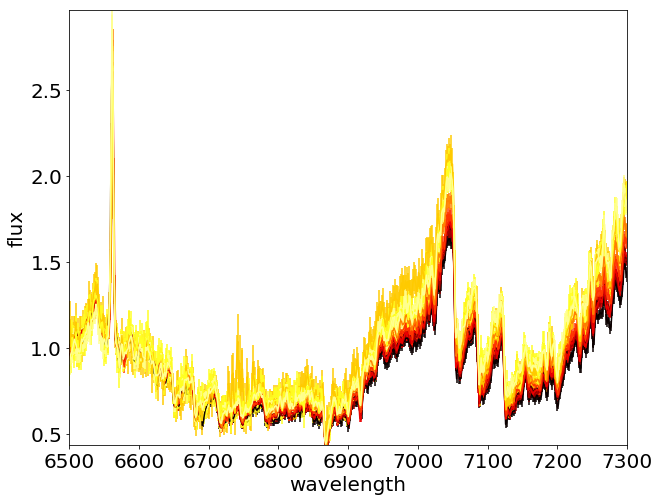

In [16]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

for i in range(9):
    fname = os.path.expanduser("~/data/OSMOS/20171105_1-2.2/finals/trim.J2327+2710.{0}.fits".format(i+1))
#     print("1.2",fname.split("/")[-1])
    w,f,v = read_mdm(fname,get_sn=True)
    norm_reg = (w>6565) & (w<6575)
    norm_by = np.median(f[norm_reg])
    plot_spec(w,f/norm_by,v/norm_by,ax=ax,wmin=6500,wmax=7300)
#     print("\n")
    
# ax.set_ylim(1e-15,3.5e-14)
plt.savefig("J2327+2710_goodwave.png")    

sec(z) = 1.010268 HA = -00:30:51
300.0
Halpha 29.965822 TiO 32.19267
sec(z) = 1.004674 HA = -00:13:29
300.0
Halpha 35.81774 TiO 38.493748
sec(z) = 1.007379 HA = +00:23:32
300.0
Halpha 32.58881 TiO 36.463436
sec(z) = 1.047737 HA = -22:42:53
300.0
Halpha 34.88219 TiO 39.424
sec(z) = 1.09629 HA = -22:10:24
300.0
Halpha 26.43818 TiO 30.465479
sec(z) = 1.176 HA = -21:34:43
300.0
Halpha 25.178188 TiO 29.959982
sec(z) = 1.176836 HA = -21:41:57
600.0
Halpha 10.794379 TiO 13.595209
sec(z) = 1.28231 HA = -21:01:37
300.0
Halpha 11.117626 TiO 14.471963
sec(z) = 1.385541 HA = -20:37:39
300.0
Halpha 17.92516 TiO 22.185463


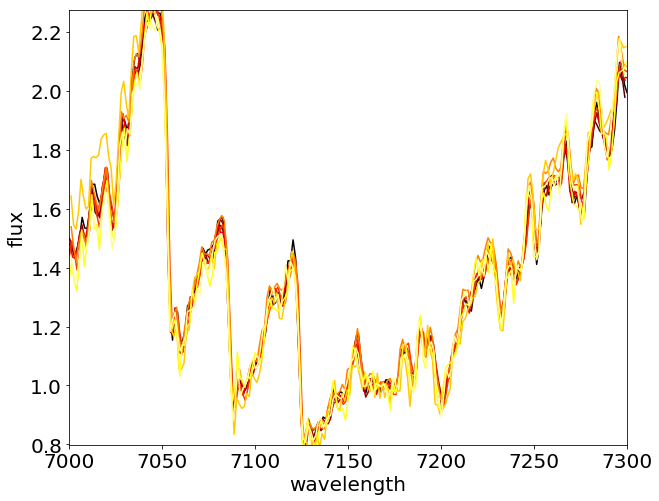

In [17]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

for i in range(9):
    fname = os.path.expanduser("~/data/OSMOS/20171105_1-2.2/finals/trim.J2327+2710.{0}.fits".format(i+1))
#     print("1.2",fname.split("/")[-1])
    w,f,v = read_mdm(fname,get_sn=True)
    norm_reg = (w>7165) & (w<7175)
    norm_by = np.median(f[norm_reg])
    plot_spec(w,f/norm_by,np.zeros_like(f),ax=ax,wmin=7000,wmax=7300)
#     print("\n")
    
# ax.set_ylim(1e-15,3.5e-14)
    

sec(z) = 1.117722 HA = +22:14:07
90.0
Halpha 61.156414 TiO 69.916885
sec(z) = 1.061587 HA = +22:50:39
60.0
Halpha 43.282154 TiO 50.7229
sec(z) = 1.03221 HA = +23:24:48
60.0
Halpha 46.38196 TiO 51.899494
sec(z) = 1.02578 HA = +00:20:53
60.0
Halpha 36.050583 TiO 41.555702
sec(z) = 1.045889 HA = +00:54:03
60.0
Halpha 43.44499 TiO 50.098145
sec(z) = 1.083466 HA = +01:25:49
60.0
Halpha 36.949677 TiO 42.76531


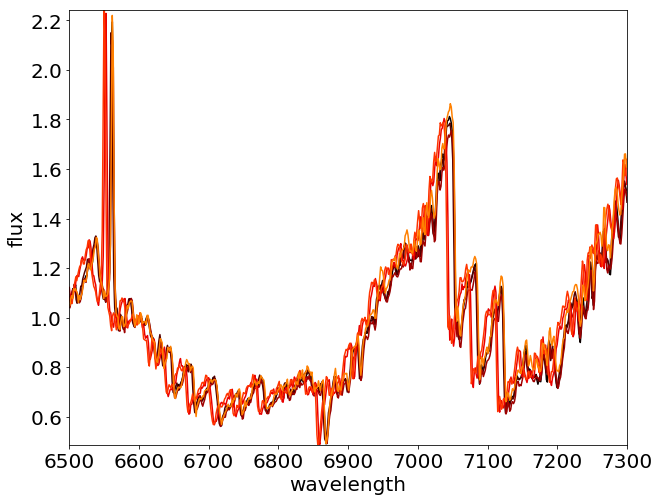

In [18]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

for i in range(6):
    fname = os.path.expanduser("~/data/OSMOS/20171105_1-2.2/finals/trim.J0016+1951W.{0}.fits".format(i+1))
#     print("1.2",fname.split("/")[-1])
    w,f,v = read_mdm(fname,get_sn=True)
    norm_reg = (w>6565) & (w<6575)
    norm_by = np.median(f[norm_reg])
    plot_spec(w,f/norm_by,np.zeros_like(f),ax=ax,wmin=6500,wmax=7300)
#     print("\n")
    
# ax.set_ylim(1e-15,3.5e-14)
plt.savefig("J0016+1951W_badwave.png")

sec(z) = 1.080689 HA = -01:31:49
600.0
Halpha 23.264997 TiO 26.389305
sec(z) = 1.044372 HA = -01:03:23
600.0
Halpha 19.040367 TiO 21.461296
sec(z) = 1.016372 HA = -00:21:07
600.0
Halpha 19.324253 TiO 22.382236
sec(z) = 1.022614 HA = -23:24:33
600.0
Halpha 19.134094 TiO 21.79031
sec(z) = 1.052601 HA = -22:49:00
600.0
Halpha 15.465512 TiO 18.028069
sec(z) = 1.099004 HA = -22:17:11
600.0
Halpha 14.99322 TiO 18.562038
sec(z) = 1.282996 HA = -21:08:53
600.0
Halpha 15.330523 TiO 15.694882


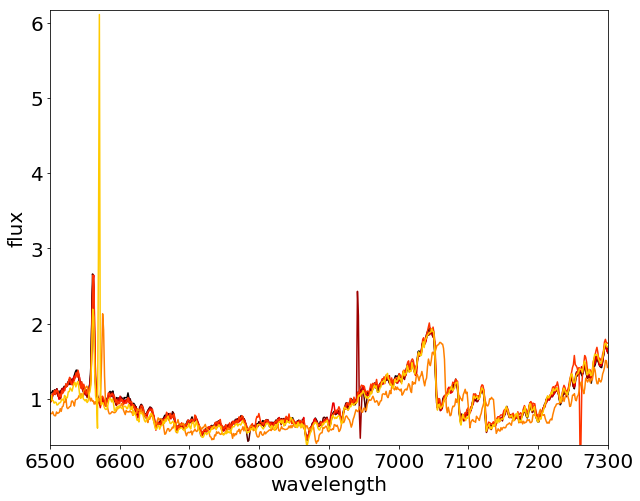

In [19]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

for i in range(7):
    fname = os.path.expanduser("~/data/OSMOS/20171105_1-2.2/finals/trim.J2344+2242.{0}.fits".format(i+1))
#     print("1.2",fname.split("/")[-1])
    w,f,v = read_mdm(fname,get_sn=True)
    norm_reg = (w>6565) & (w<6575)
    norm_by = np.median(f[norm_reg])
    plot_spec(w,f/norm_by,np.zeros_like(f),ax=ax,wmin=6500,wmax=7300)
#     print("\n")
    
# ax.set_ylim(1e-15,3.5e-14)
plt.savefig("J2344+2242_badwave_halphavar.png")

sec(z) = 1.080689 HA = -01:31:49
600.0
Halpha 23.264997 TiO 26.389305
sec(z) = 1.044372 HA = -01:03:23
600.0
Halpha 19.040367 TiO 21.461296
sec(z) = 1.016372 HA = -00:21:07
600.0
Halpha 19.324253 TiO 22.382236
sec(z) = 1.022614 HA = -23:24:33
600.0
Halpha 19.134094 TiO 21.79031
sec(z) = 1.052601 HA = -22:49:00
600.0
Halpha 15.465512 TiO 18.028069
sec(z) = 1.099004 HA = -22:17:11
600.0
Halpha 14.99322 TiO 18.562038
sec(z) = 1.282996 HA = -21:08:53
600.0
Halpha 15.330523 TiO 15.694882


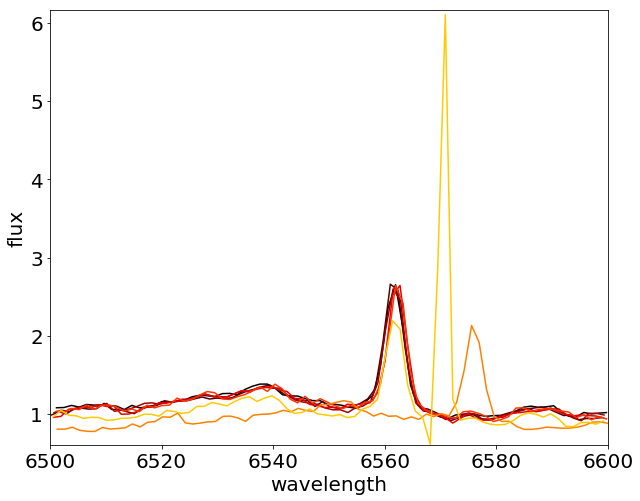

In [20]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

for i in range(7):
    fname = os.path.expanduser("~/data/OSMOS/20171105_1-2.2/finals/trim.J2344+2242.{0}.fits".format(i+1))
#     print("1.2",fname.split("/")[-1])
    w,f,v = read_mdm(fname,get_sn=True)
    norm_reg = (w>6565) & (w<6575)
    norm_by = np.median(f[norm_reg])
    plot_spec(w,f/norm_by,np.zeros_like(f),ax=ax,wmin=6500,wmax=6600)
#     print("\n")
    
# ax.set_ylim(1e-15,3.5e-14)
plt.savefig("J2344+2242_badwave_halphazoom.png")

NameError: name 'pdat' is not defined